In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#importing pandas as pd 

In [3]:
#data=pd.read_excel("/Users/oluwasheyi/Downloads/shootings.xlsx",index_col=0)
data = pd.read_excel("shootings.xlsx")
data['date']=pd.to_datetime(data['date'],format="%m %d %Y")
#pd. to_datetime() method helps to convert string Date time into Python Date time object.


In [3]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
data.shape
#This shows the number of rows and columns in our data

(4895, 15)

# BASIC ANALYSIS

In [5]:
data.gender.value_counts()
#This shows the number of males and females who were killed

M    4673
F     222
Name: gender, dtype: int64

In [6]:
data.race.value_counts()
#this counts the number of people in a particular race

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: race, dtype: int64

In [9]:
data.manner_of_death.value_counts()
#This shows number of people who died through a particular manner of death

shot                4647
shot and Tasered     248
Name: manner_of_death, dtype: int64

In [10]:
data.armed.value_counts()
#This shows the number of people who were armed with a particular weapon

gun                        2755
knife                       708
unknown                     418
unarmed                     348
toy weapon                  171
                           ... 
baseball bat and bottle       1
cordless drill                1
metal hand tool               1
car, knife and mace           1
metal rake                    1
Name: armed, Length: 89, dtype: int64

In [11]:
data.signs_of_mental_illness.value_counts()
#the number of people who showed and did not show signs of mental illness

False    3792
True     1103
Name: signs_of_mental_illness, dtype: int64

In [8]:
data.body_camera.value_counts()
#Number of killings which were recorded.

False    4317
True      578
Name: body_camera, dtype: int64

In [13]:
h_shotCity=data.city.value_counts(ascending=False)
h_shotCity.head()

Los Angeles    78
Phoenix        66
Houston        51
Las Vegas      41
San Antonio    40
Name: city, dtype: int64

In [14]:
A_category=data.arms_category.value_counts()
A_category
#number of arms(category) used.

Guns                     2764
Sharp objects             818
Unknown                   418
Unarmed                   348
Other unusual objects     192
Blunt instruments         122
Vehicles                  121
Multiple                   54
Piercing objects           29
Electrical devices         24
Explosives                  4
Hand tools                  1
Name: arms_category, dtype: int64

In [20]:
F_lee = data.flee.value_counts()
F_lee
#number of suspects who attempted fleeing

Not fleeing    3073
Car             820
Foot            642
Other           360
Name: flee, dtype: int64

In [139]:
whites=len(data.loc[(data.race=='White')])/len(data.race) * 100
non_whites=len(data.loc[~(data.race=='White')])/len(data.race) * 100
print('The percentage of whites killed are: ', round(whites,2))
print(f'The percentage of non whites killed are:  ', round(non_whites,2))

The percentage of whites killed are:  50.58
The percentage of non whites killed are:   49.42


   # DATA VISUALIZATION
# How many number of killings according to race were recorded?


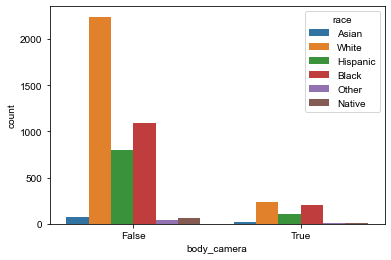

In [16]:
sns.countplot(x='body_camera',data=data, hue="race");
sns.set(rc={'figure.figsize':(25,10)})

white recorded the highest number of killing but it has the almost the same number of recorded cases as Blacks.
from this we can infer that killing of the whites are mostly not recorded

# which race had the highest number of killings?.How many men and women were killed under a specific race?

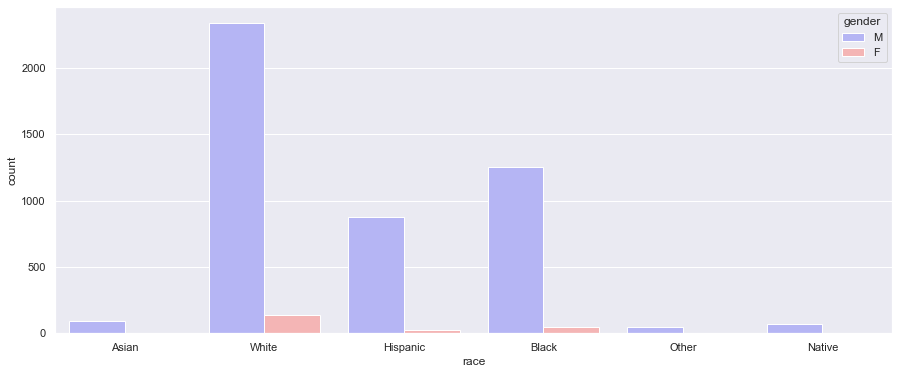

In [13]:
sns.countplot(x='race',data=data, hue="gender",palette='bwr');
sns.set(rc={'figure.figsize':(10,6)})

The whites has the highiest number of killing followed by the blacks.
others have the least number if killing

# what is the age distribution of killings based in gender?

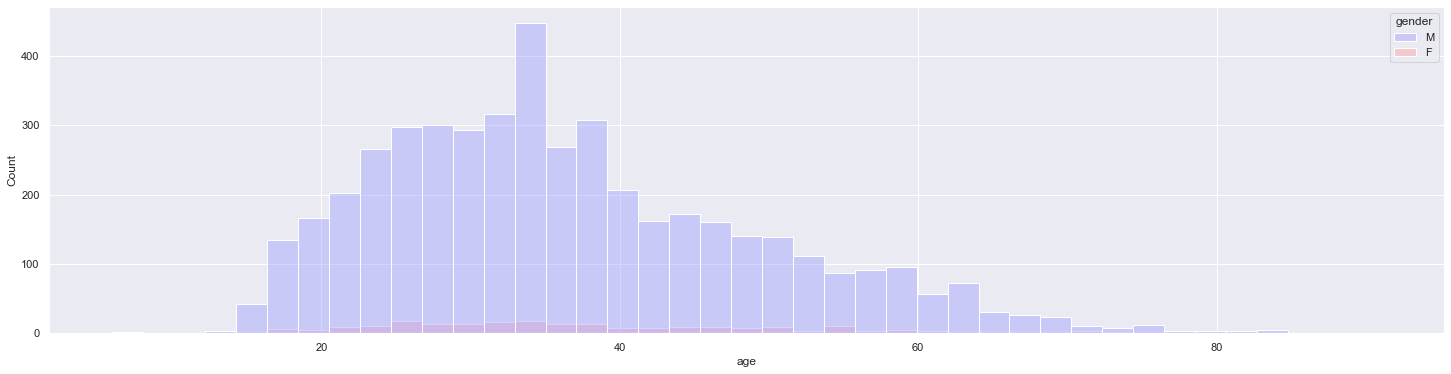

In [18]:
sns.histplot(data=data, x='age',hue='gender',palette='bwr');
sns.set(rc={'figure.figsize':(22,6)})

# which state recorded the highest number of killings?.

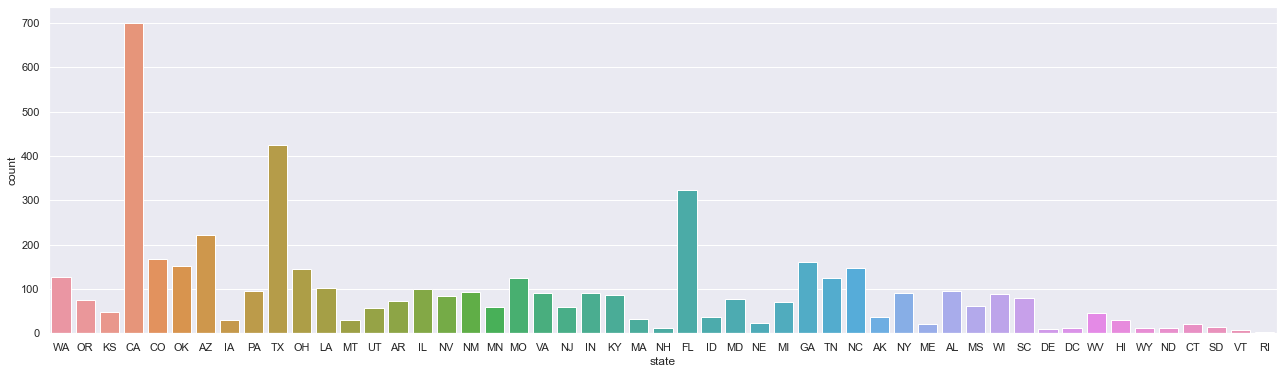

In [19]:
sns.countplot(x='state',data=data,);
sns.set(rc={'figure.figsize':(30,6)})

From this we could see that the top five (5) states that recorded the highest number of killing are Califonia, Texas, Florida, Arizona and Georgia. Also the last five (5) states thar recorded the least number of killing are Vermont, Delaware, New Hampshire, wishinton, wyoming.

The cencus conducted by the United state cencus Berea shows that the  whites are the most dominate people living in the states that recorded low number of killing and they are the least dominate at the states that recorded high number of killing 
link https://worldpopulationreview.com/states/states-by-race


From this we can infer that the whites are not the target of the killing 

# Which city has the highest shooting?

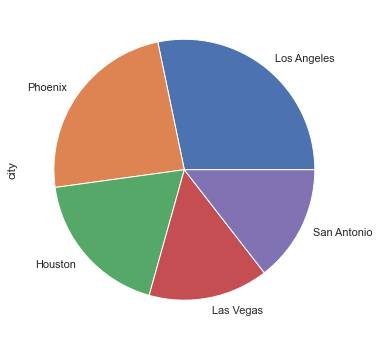

In [20]:

h_shotCity.head().plot(kind='pie');
sns.set(rc={'figure.figsize':(5,5)})

The piechart above indicate the top five cities with high number of killing. all the cities are found in the states that have less number of whites.
From this we can infer that killing the target of the killing was not the the whites but the other races.

# Which race used the highest arms(category)?

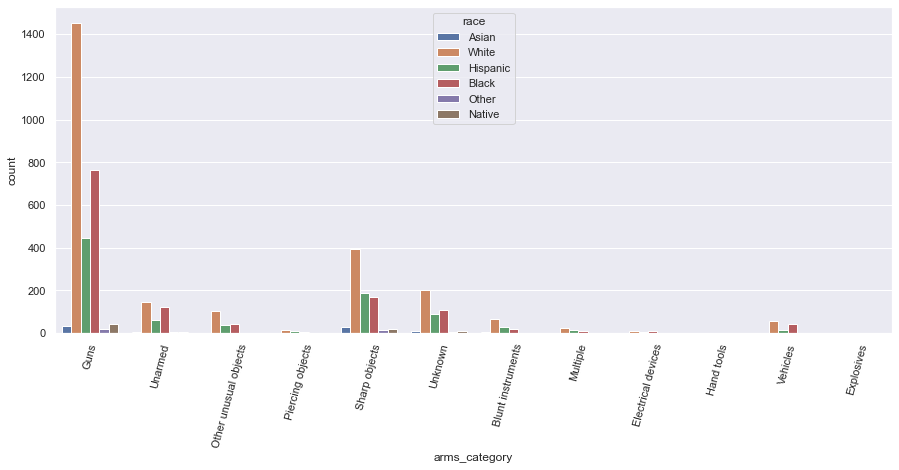

In [18]:
plt.xticks(rotation=75)
sns.countplot(x='arms_category',data=data, hue="race");
sns.set(rc={'figure.figsize':(15,10)})

 the number of unarmed whites are close to the number of unarmed balcks but the white are two times more that the blacks.
 this shows that the whites uses arms more than the non-whites. This means that the whites are more likely to attack than all the other races together (non-whites).

# How many suspects attempted fleeing?

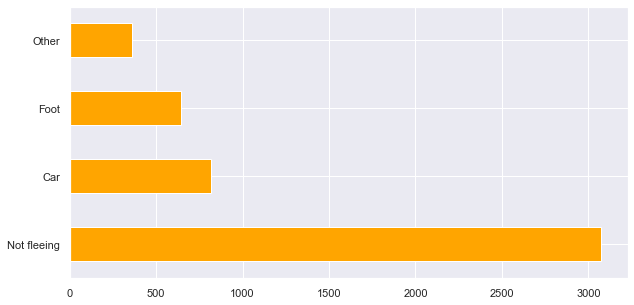

In [24]:
F_lee.plot(kind='barh',color="orange");
sns.set(rc={'figure.figsize':(10,7)})

# Age grouping of Shootings

In [23]:
#18 and below
under18=data.loc[data.age<=17]
under18.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
51,100,Kristiana Coignard,2015-01-22,shot and Tasered,knife,17.0,F,White,Longview,TX,True,other,Not fleeing,False,Sharp objects
59,20,Jessie Hernandez,2015-01-26,shot,unknown,17.0,F,Hispanic,Denver,CO,False,other,Not fleeing,False,Unknown
77,528,Jacob Haglund,2015-02-02,shot,gun,17.0,M,White,Bay City,MI,False,attack,Not fleeing,False,Guns
109,149,Jason C. Hendrix,2015-02-14,shot,gun,16.0,M,White,Essex,MD,True,attack,Car,False,Guns
133,176,A'Donte Washington,2015-02-23,shot,gun,16.0,M,Black,Millbrook,AL,False,attack,Not fleeing,False,Guns


In [24]:
#18 and above
over18=data.loc[data.age>=18]
over18.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [25]:
Y_and_O =pd.DataFrame({'Number of Shootings':[len(over18),len(under18)]},
             index=['Over 18','Under 18'])
Y_and_O
#number of shootings of suspects more than and less than the age of 18

,Number of Shootings
Over 18,4798
Under 18,97


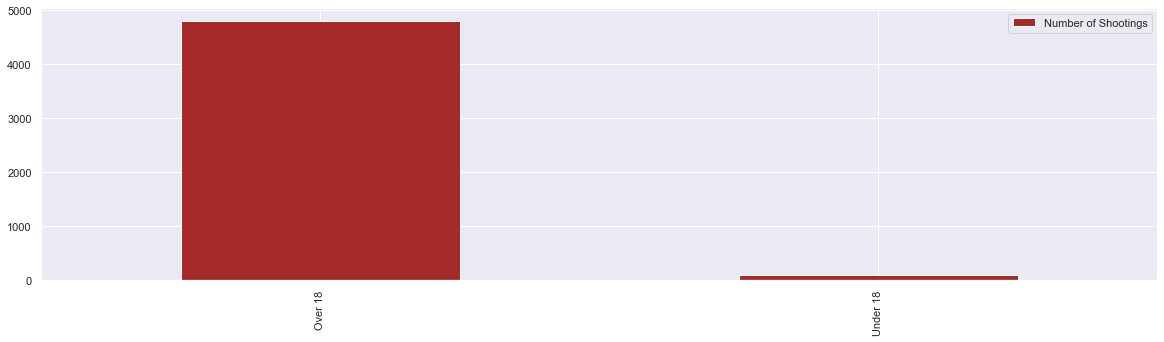

In [26]:
Y_and_O.plot(kind='bar',color='brown');
sns.set(rc={'figure.figsize':(10,10)})

# How many suspects below and above 18 years were killed? How many are males and females?

In [27]:
#under 18 years
under18.groupby(['gender']).manner_of_death.agg([len,min,max]).sort_values(by='len',ascending =False)

,len,min,max
gender,,,
M,90,shot,shot and Tasered
F,7,shot,shot and Tasered


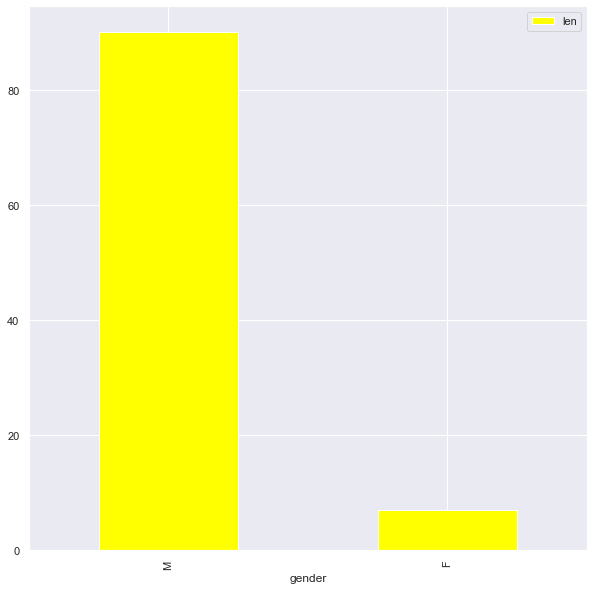

In [28]:
#under 18 years
under18.groupby(['gender']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='yellow');
sns.set(rc={'figure.figsize':(3,5)})

In [29]:
#over 18 years
over18.groupby(['gender']).manner_of_death.agg([len,min,max]).sort_values(by='len',ascending =False)

,len,min,max
gender,,,
M,4583,shot,shot and Tasered
F,215,shot,shot and Tasered


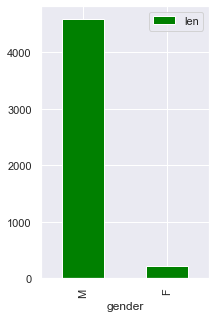

In [30]:
#over 18 years
over18.groupby(['gender']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='green');


# Grouping of Shootings by Year

In [4]:
shot_2015=data.loc[data['date']<='2015-12-31']
shot_2020=data.loc[(data['date']>'2019-12-31')&(data['date']<='2020-12-31')]
shot_2016=data.loc[(data['date']>'2015-12-31')&(data['date']<='2016-12-31')]
shot_2017=data.loc[(data['date']>'2016-12-31')&(data['date']<='2017-12-31')]
shot_2018=data.loc[(data['date']>'2017-12-31')&(data['date']<='2018-12-31')]
shot_2019=data.loc[(data['date']>'2018-12-31')&(data['date']<='2019-12-31')]
#shot_2015
#shot_2016
#shot_2017
#shot_2018
#shot_2019
#shot_2020

# Number of Shootings of Race Per Each Year
# a. 2015

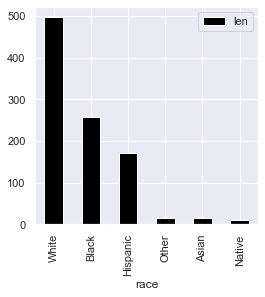

In [6]:
shot_2015.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# b. 2016

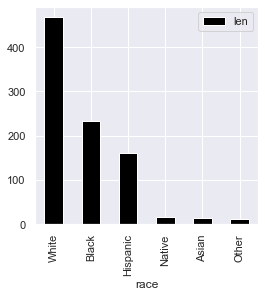

In [33]:
shot_2016.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# c. 2017

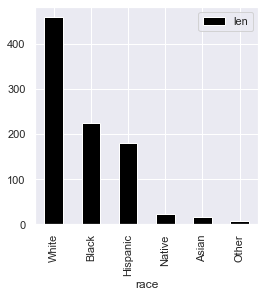

In [34]:
shot_2017.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})


# d. 2018

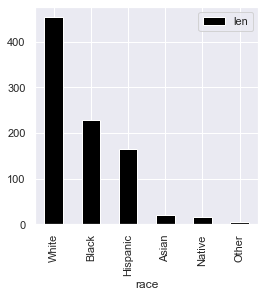

In [35]:
shot_2018.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})


# e. 2019

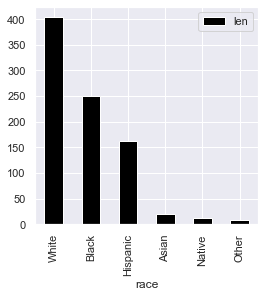

In [36]:
shot_2019.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# f. 2020

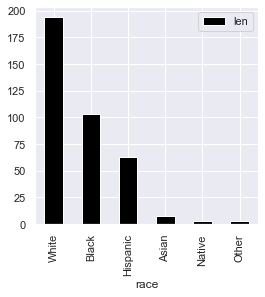

In [37]:
shot_2020.groupby(['race']).manner_of_death.agg([len]).sort_values(by='len',ascending =False).plot(kind='bar', color='black');
sns.set(rc={'figure.figsize':(4,4)})

# Armed and Unarmed blacks


In [38]:
#data for both Armed and Unarmed
b_armed=data.loc[(data.race=='Black')&~(data.arms_category=='Unarmed')]
b_unarmed=data.loc[(data.race=='Black')&(data.arms_category=='Unarmed')]



In [39]:
#length of the data
print('Blacks Unarmed:',len(b_unarmed))
print('Blacks armed:',len(b_armed))

Blacks Unarmed: 123
Blacks armed: 1175


In [40]:
#lenght of data of blacks- claimed armed 
b_armed_noproof=b_armed.loc[b_armed.body_camera==False]

In [41]:
#length  of Blacks claimed armed But no proof
print('Blacks claimed armed But no proof:',len(b_armed_noproof))

Blacks claimed armed But no proof: 994


In [42]:
#PERCENTAGE 
percentage_claim=(len(b_armed_noproof)/len(b_armed))*100
ans=round(percentage_claim)
print(f'Percentage of suspects claimed to be armed without proof:{ans}%')

Percentage of suspects claimed to be armed without proof:85%


# Percentage of suspects who fled

In [120]:
flee=data.loc[~(data.flee=='Not fleeing')]
didnt_flee=data.loc[(data.flee=='Not fleeing')]

In [121]:
print('Number of Fled Cases:',len(flee))
print('Number of no Fled Cases:',len(didnt_flee))

Number of Fled Cases: 1822
Number of no Fled Cases: 3073


In [69]:
percent_flee=(len(flee)/len(data))*100
away=round(percent_flee)
print(f'Percentage of suspects who fled: {away}%')

Percentage of suspects who fled: 37%


In [128]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


# Men under 45 are the victims

In [46]:
men_under45=data.loc[(data.gender=='M')&(data.age<=45)]
men_over45=data.loc[(data.gender=='M')&~(data.age<=45)]

In [47]:
print(f'Number of Men over 45 years :{len(men_over45)}')
print(f'Number of Men under 45 years :{len(men_under45)}')

Number of Men over 45 years :1082
Number of Men under 45 years :3591


In [48]:
years45=pd.DataFrame({'Year':['men_over45','men_under45'],
                      'Number_of_death':[len(men_over45),len(men_under45)]},
                    index=['Men 45 Years and above','Men below 45 Years'])
years45

,Year,Number_of_death
Men 45 Years and above,men_over45,1082
Men below 45 Years,men_under45,3591


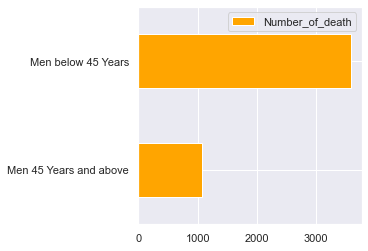

In [49]:
years45=pd.DataFrame({'Year':['men_over45','men_under45'],
                      'Number_of_death':[len(men_over45),len(men_under45)]},
                    index=['Men 45 Years and above','Men below 45 Years'])
years45.plot(kind='barh',color='orange');